In [2]:
import pandas as pd # manipulação de dados em formato de dataframe
import numpy as np # operações matemáticas
import seaborn as sns # visualização gráfica
import matplotlib.pyplot as plt # visualização gráfica
import plotly.graph_objects as go # gráficos 3D
from scipy.stats import pearsonr # correlações de Pearson
import statsmodels.api as sm # estimação de modelos
from statsmodels.iolib.summary2 import summary_col # comparação entre modelos
from sklearn.preprocessing import LabelEncoder # transformação de dados
import pingouin as pg # outro modo para obtenção de matrizes de correlações
import emojis # inserção de emojis em gráficos
from statstests.process import stepwise # procedimento Stepwise
from statstests.tests import shapiro_francia # teste de Shapiro-Francia
from scipy.stats import boxcox # transformação de Box-Cox
from scipy.stats import norm # para plotagem da curva normal
from scipy import stats # utilizado na definição da função 'breusch_pagan_test'

### Estatísta T de Student e P-value no summary

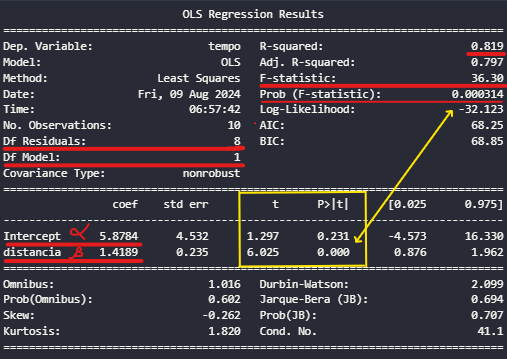

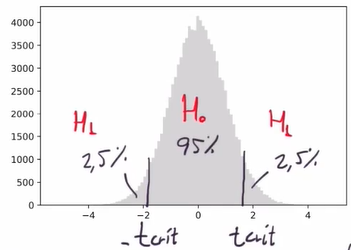

Estaítica T é bi-caldal devido ao seu formato!

```H0: p-value t > 0,05 -> parâmetro não estatísticamente significante ao nível de sinificância de 5% ou nível de confiança de 95%```

```H1: p-value t <= 0,05 -> parâmetro estatísticamente significante ao nível de sinificância de 5% ou nível de confiança de 95%```

**Para modelos de regressão simples, t² = F!!**

In [3]:
# Carregamento do dataset
df_tempodist = pd.read_csv('../data/tempodist.csv', delimiter=',')

In [4]:
# Estimação do modelo de regressão linear simples

# Estimação do modelo
modelo = sm.OLS.from_formula('tempo ~ distancia', df_tempodist).fit()

In [6]:
# Cálculo da estatísitica F
n = modelo.nobs
graus_liberdade_modelo = modelo.df_model # Quantidade de Variáveis
graus_liberdade_dos_erros = modelo.df_resid # Quantidade de observações - 1 (intercepto) - 1 (quantidade de variáveis, 
                                     # pois não se pode ter uma convergência do modelo se tiver uma quantidade 
                                     # maior de colunas do que de linhas)

F = (modelo.ess / graus_liberdade_modelo) / (modelo.ssr / graus_liberdade_dos_erros)

In [22]:
# Cálculo da estatística t do beta da variável distância para o exemplo
# Se t² = F, logo, t = raiz quadrada de F
T = np.sqrt(F)

print(f"Estatítica t de Student para o parâmetro beta correspondente a variável distância é de {T:.3f}")

Estatítica t de Student para o parâmetro beta correspondente a variável distância é de 6.025


In [23]:
# Cálculo do p-value da estatística t
from scipy.stats import t

p_value_t = t.sf(T, graus_liberdade_dos_erros) * 2 # (*2 pq é bicaudal)

print(f"O valor do p-value da estatística t é o mesmo que o p-value de f (Prob F-Statistics do summary report) {p_value_t:.6f}")

O valor do p-value da estatística t é o mesmo que o p-value de f (Prob F-Statistics do summary report) 0.000314


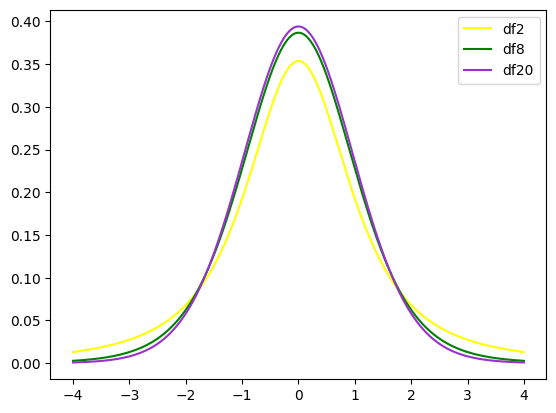

In [25]:
# Gráfico de distribuição t hipotéticas com vários graus de liberdade que demonstram a convergência para uma normal

x = np.arange(-4, 4, 0.0001)

plt.plot(x, t.pdf(x, 2), label="df2", color="yellow")
plt.plot(x, t.pdf(x, 8), label="df8", color="green")
plt.plot(x, t.pdf(x, 20), label="df20", color="darkorchid")
plt.legend()
plt.show()